# Exploring categorical variables

## Comparing numerical data across groups

## Import data

In [26]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "county.csv"

df = pd.read_csv(ROOT + DATA)
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban,pop_change_3levels,population_change
0,Autauga County,Alabama,43671.0,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none,gain,gain
1,Baldwin County,Alabama,140415.0,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none,gain,gain
2,Barbour County,Alabama,29038.0,27457,25270,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial,loss,no gain
3,Bibb County,Alabama,20826.0,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none,gain,gain
4,Blount County,Alabama,51024.0,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none,gain,gain


In [27]:
# Head for selected variables
df[["state", "name", "pop_change", "population_change", "median_hh_income"]].head(5)

,state,name,pop_change,population_change,median_hh_income
0,Alabama,Autauga County,1.48,gain,55317.0
1,Alabama,Baldwin County,9.19,gain,52562.0
2,Alabama,Barbour County,-6.22,no gain,33368.0
3,Alabama,Bibb County,0.73,gain,43404.0
4,Alabama,Blount County,0.68,gain,47412.0


## Histogram

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"

colors_blue = [blue, blue_light]

## Histograms for two groups

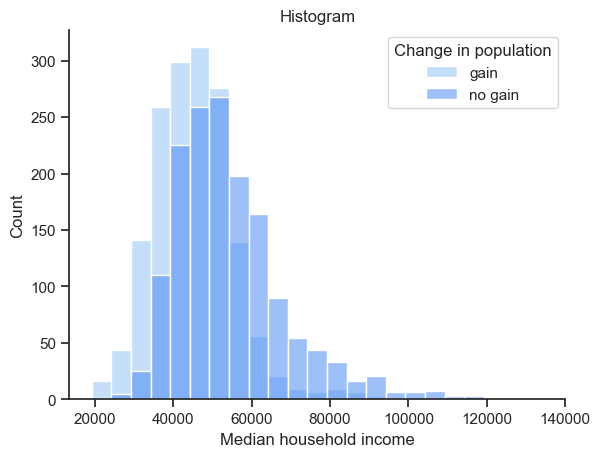

In [29]:
fig, ax = plt.subplots()

sns.histplot(data=df, 
            x="median_hh_income", 
            binwidth= 5000,
            hue="population_change", 
            palette=colors_blue)

plt.title("Histogram")
plt.xlabel("Median household income")
plt.legend(title='Change in population', loc='upper right', labels=['gain', 'no gain'])


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show();

## Side-by-side box plot

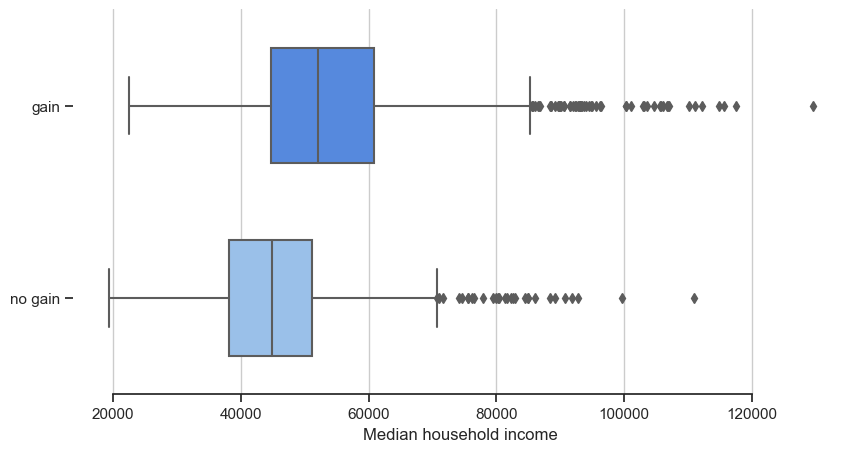

In [30]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10, 5))

# Draw boxplot
sns.boxplot(y="population_change", 
            x="median_hh_income",
            palette=colors_blue,
            width=.6,
            data=df)
            
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="Median household income", ylabel="")
sns.despine(trim=True, left=True)


plt.show();

## Faceting

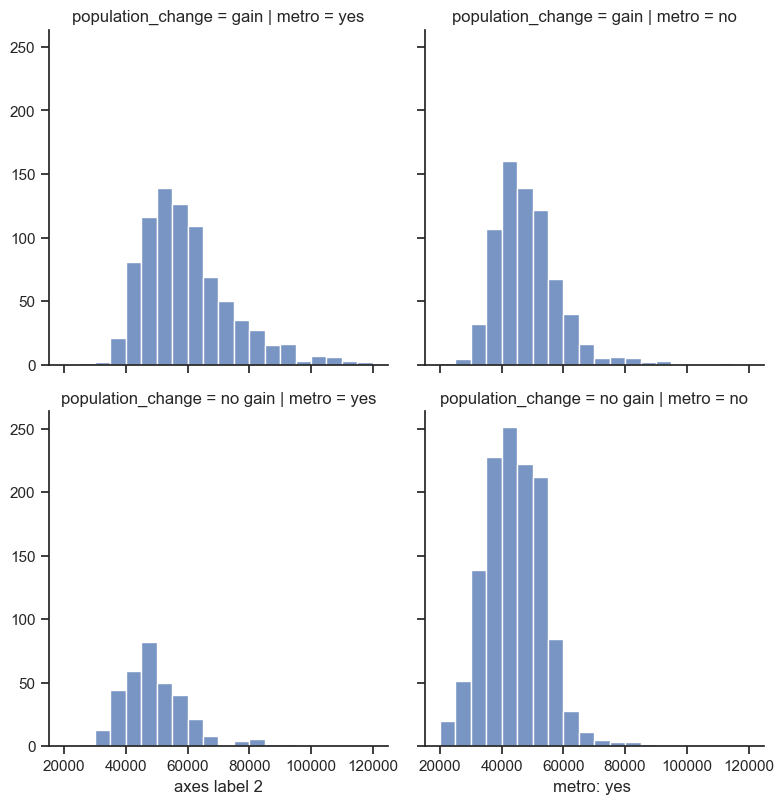

In [31]:
g = sns.FacetGrid(df, col="metro",  row="population_change", height=4 )
g.map_dataframe(sns.histplot, x="median_hh_income", binwidth=5000, binrange=(20000, 120000))

plt.show();